<a href="https://colab.research.google.com/github/RabHuss/RabHuss/blob/main/Capstone_Project_RRH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Importing necessary libraries, Loading data, Checking for basic info and  Data Cleaning.

In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("covid_19_clean_complete.csv")


print(df.info())
print(df.describe())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None
                Lat          Long     Confirmed         Deaths     Recovered        Active
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04  4.906800e+04
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03  8.085012e+03
std       2

In [29]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [30]:

if 'Date' in df.columns:
  print("The 'Date' column exists in the DataFrame.")
else:
  print("The 'Date' column does not exist in the DataFrame.")

The 'Date' column exists in the DataFrame.


In [31]:
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])



<ipython-input-31-edc8309f4e80>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [32]:
scaler = StandardScaler()
numerical_features = ['Active', 'Deaths', 'Recovered']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


df['daily_growth_rate'] = df['Active'].pct_change().fillna(0)
df['mortality_rate'] = df['Deaths'] / df['Active'].replace({0: np.nan})


 Exploratory Data Analysis (EDA)



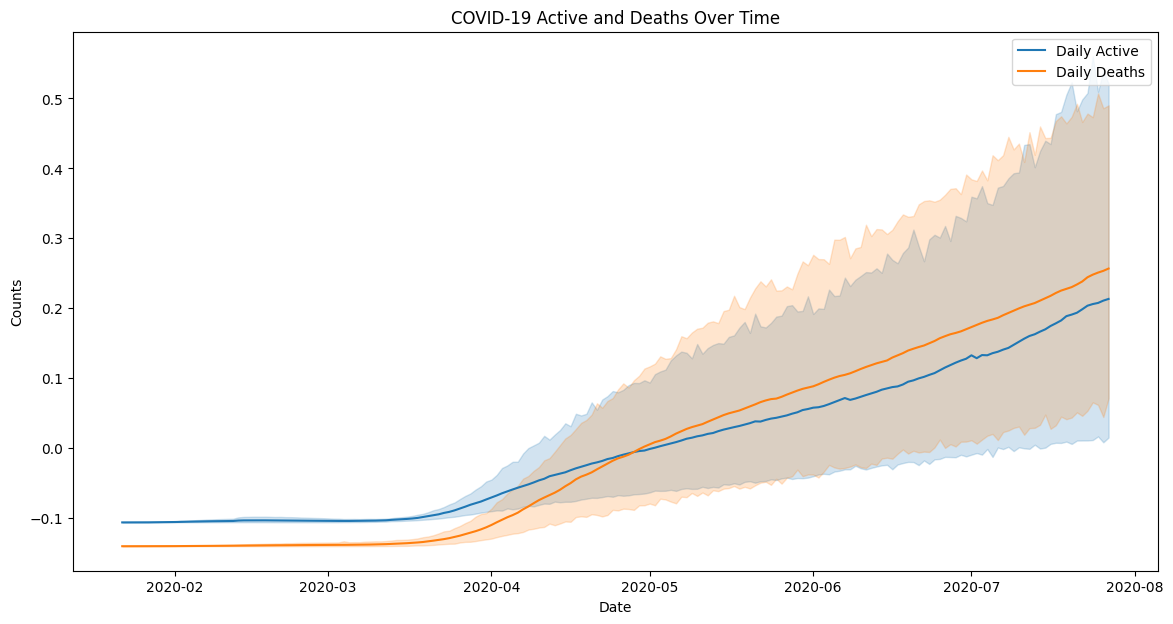

In [35]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Active', label='Daily Active')
sns.lineplot(data=df, x='Date', y='Deaths', label='Daily Deaths')
plt.title('COVID-19 Active and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.show()



Select only numeric features for correlation analysis

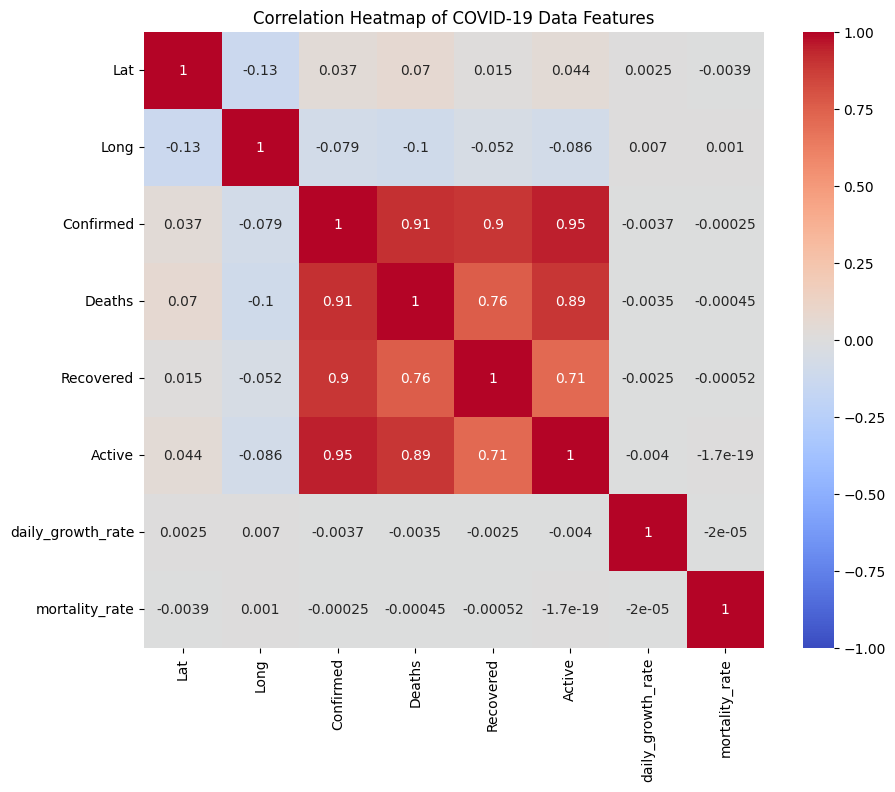

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of COVID-19 Data Features')
plt.show()

 Model Development
Time-Series Forecasting with ARIMA



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Active   No. Observations:                39254
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -40679.212
Date:                Tue, 12 Nov 2024   AIC                          81370.424
Time:                        13:48:07   BIC                          81421.891
Sample:                             0   HQIC                         81386.729
                              - 39254                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8508      0.001   -615.650      0.000      -0.854      -0.848
ar.L2         -0.5442      0.002   -344.974      0.000      -0.547      -0.541
ar.L3         -0.4222      0.002   -231.948      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


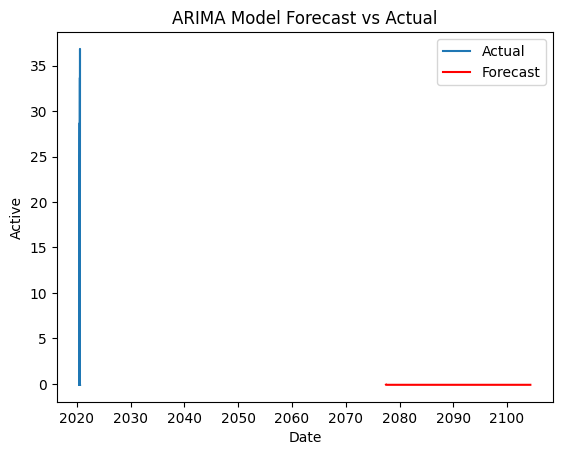

In [38]:
from statsmodels.tsa.arima.model import ARIMA


cases_series = df.set_index('Date')['Active']


train_size = int(len(cases_series) * 0.8)
train, test = cases_series[:train_size], cases_series[train_size:]


arima_model = ARIMA(train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())


forecast = arima_model_fit.forecast(steps=len(test))
plt.plot(test, label='Actual')
plt.plot(forecast, color='red', label='Forecast')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Active')
plt.legend()
plt.show()


Classification Model for Severity Prediction

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df['high_mortality'] = (df['mortality_rate'] > 0.02).astype(int)


X = df[['Active', 'daily_growth_rate']]
y = df['high_mortality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9724882820460566
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       427
           1       0.98      0.99      0.99      9387

    accuracy                           0.97      9814
   macro avg       0.85      0.79      0.82      9814
weighted avg       0.97      0.97      0.97      9814



Data Visualization and Reporting



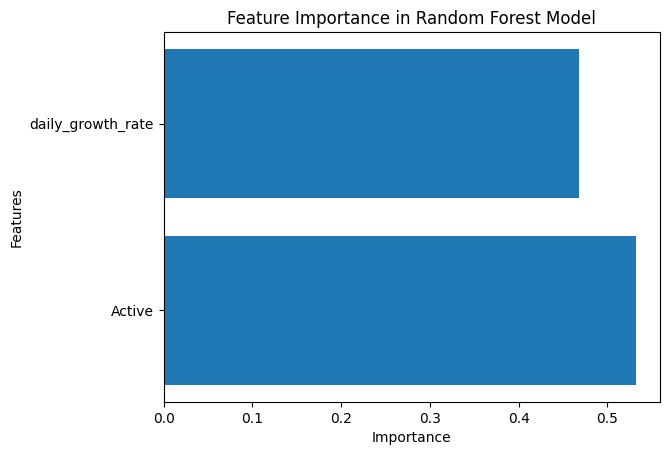

In [40]:

feature_importances = rf_model.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()
